# 26.4 - Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [3]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

## Question 1

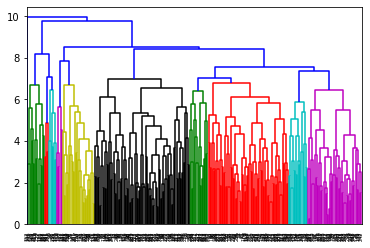

In [5]:
dendrogram(linkage(X_std, method='complete'))
plt.show()

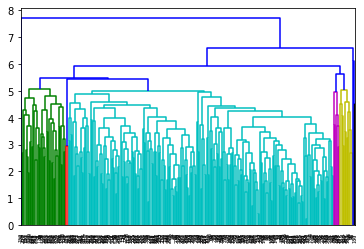

In [6]:
dendrogram(linkage(X_std, method='average'))
plt.show()

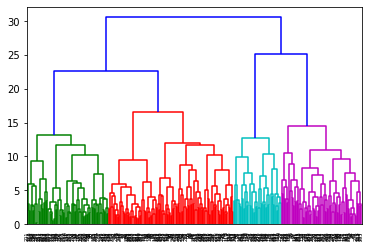

In [7]:
dendrogram(linkage(X_std, method='ward'))
plt.show()

I'm not sure how much viewing this in one dimension helps us determine best performance. The last method (ward) produces 4 clusters that look relatively even and similar. The clustering for the average method looks very disjointed.

## Question 2

In [11]:
agg = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=2)
clusters = agg.fit_predict(X_std)
print('ARI score:  {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('Silhouette: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score:  0.21394030618551016
Silhouette: 0.11730765444448985


In [12]:
agg = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2)
clusters = agg.fit_predict(X_std)
print('ARI score:  {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('Silhouette: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score:  0.2940490133353465
Silhouette: 0.14837359969689895


In [14]:
agg = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
clusters = agg.fit_predict(X_std)
print('ARI score:  {}'.format(metrics.adjusted_rand_score(y,clusters)))
print('Silhouette: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score:  0.146129913123814
Silhouette: 0.1387197366557222


The 'Average' method worked the best by all metrics, which is surprising considering that was the dendeogram which I said looked the worst. All methods perform better according the ARI, but worse according to silhouette. 